In [1]:
%pylab inline
import AirMagTools.magdata
import AirMagTools.pipeline
import AirMagTools.plots
import os

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
datafile_path = "../example_datasets/full_test_data.csv"
project_crs = 32605

In [3]:
d = AirMagTools.magdata.MagData.load(datafile_path, crs=project_crs)

In [4]:
d

crs: 32605
filename: full_test_data.csv
sample_frequency: 40.000000009313226


             count          mean           std           min           25%           50%           75%           max
date      247882.0  2.023721e+03      0.006817  2.023715e+03  2.023715e+03  2.023715e+03  2.023729e+03  2.023729e+03
dtm       247882.0  4.075875e+02    162.649756  1.202800e+02  3.041200e+02  3.721900e+02  4.798100e+02  1.330590e+03
diurnal   247882.0  5.515270e+04     28.575697  5.509173e+04  5.512978e+04  5.515686e+04  5.516484e+04  5.520381e+04
easting   247882.0  6.986166e+05  32364.958619  6.399358e+05  6.707023e+05  7.019343e+05  7.240310e+05  7.591394e+05
gpsalt    247882.0  6.133577e+02    209.974463  2.623400e+02  4.724000e+02  5.671500e+02  6.944775e+02  1.599090e+03
maguncom  247882.0  5.550192e+04     62.121445  5.534899e+04  5.546006e+04  5.548458e+04  5.553544e+04  5.589800e+04
utctime   247882.0  7.743510e+04   8789.327998  6.395966e+04  6.550900e+04  8.300278e+04  8.399063e+04

In [5]:
d.meta

{'filename': 'full_test_data.csv',
 'crs': 32605,
 'sample_frequency': 40.000000009313226}

In [6]:
d.data

date     dtm     diurnal     easting  gpsalt  \
line  fidcount                                                        
L5992 70476     2023.715068  331.68  55183.4786  705607.140  505.28   
      70477     2023.715068  331.65  55183.4786  705608.104  505.22   
      70478     2023.715068  331.62  55183.4787  705609.070  505.15   
      70479     2023.715068  331.59  55183.4787  705610.036  505.09   
      70480     2023.715068  331.56  55183.4788  705611.002  505.03   
...                     ...     ...         ...         ...     ...   
L6370 972931    2023.728767  335.32  55158.9376  748065.794  546.29   
      972932    2023.728767  335.45  55158.9387  748066.803  546.27   
      972933    2023.728767  335.58  55158.9398  748067.812  546.24   
      972934    2023.728767  335.71  55158.9409  748068.821  546.21   
      972935    2023.728767  335.84  55158.9420  748069.830  546.18   

                  maguncom     utctime  surface      magcom  flight  \
line  fidcount                                                        
L5992 70476     55548.7900  83429.0774   484.05  55572.7584       1   
      70477     55548.7409  83429.1024   484.02  55572.7603       1   
      70478     55548.6912  83429.1274   483.99  55572.7645       1   
      70479     55548.6406  83429.1524   483.97  55572.7712       1   
      70480     55548.5892  83429.1774   483.94  55572.7801       1   
...                    ...         ...      ...         ...     ...   
L6370 972931    55555.4357  84755.4434   532.88  55573.4781       2   
      972932    55555.4472  84755.4684   532.84  55573.4870       2   
      972933    55555.4553  84755.4934   532.81  55573.4965       2   
      972934    55555.4596  84755.5184   532.77  55573.5071       2   
      972935    55555.4607  84755.5434   532.73  55573.5196       2   

                   northing  
line  fidcount               
L5992 70476     7054198.874  
      70477     7054199.137  
      70478     7054199.397  
      70479     7054199.656  
      70480     7054199.915  
...                     ...  
L6370 972931    7038994.651  
      972932    7038994.664  
      972933    7038994.676  
      972934    7038994.689  
      972935    7038994.701  

[247882 rows x 11 columns]

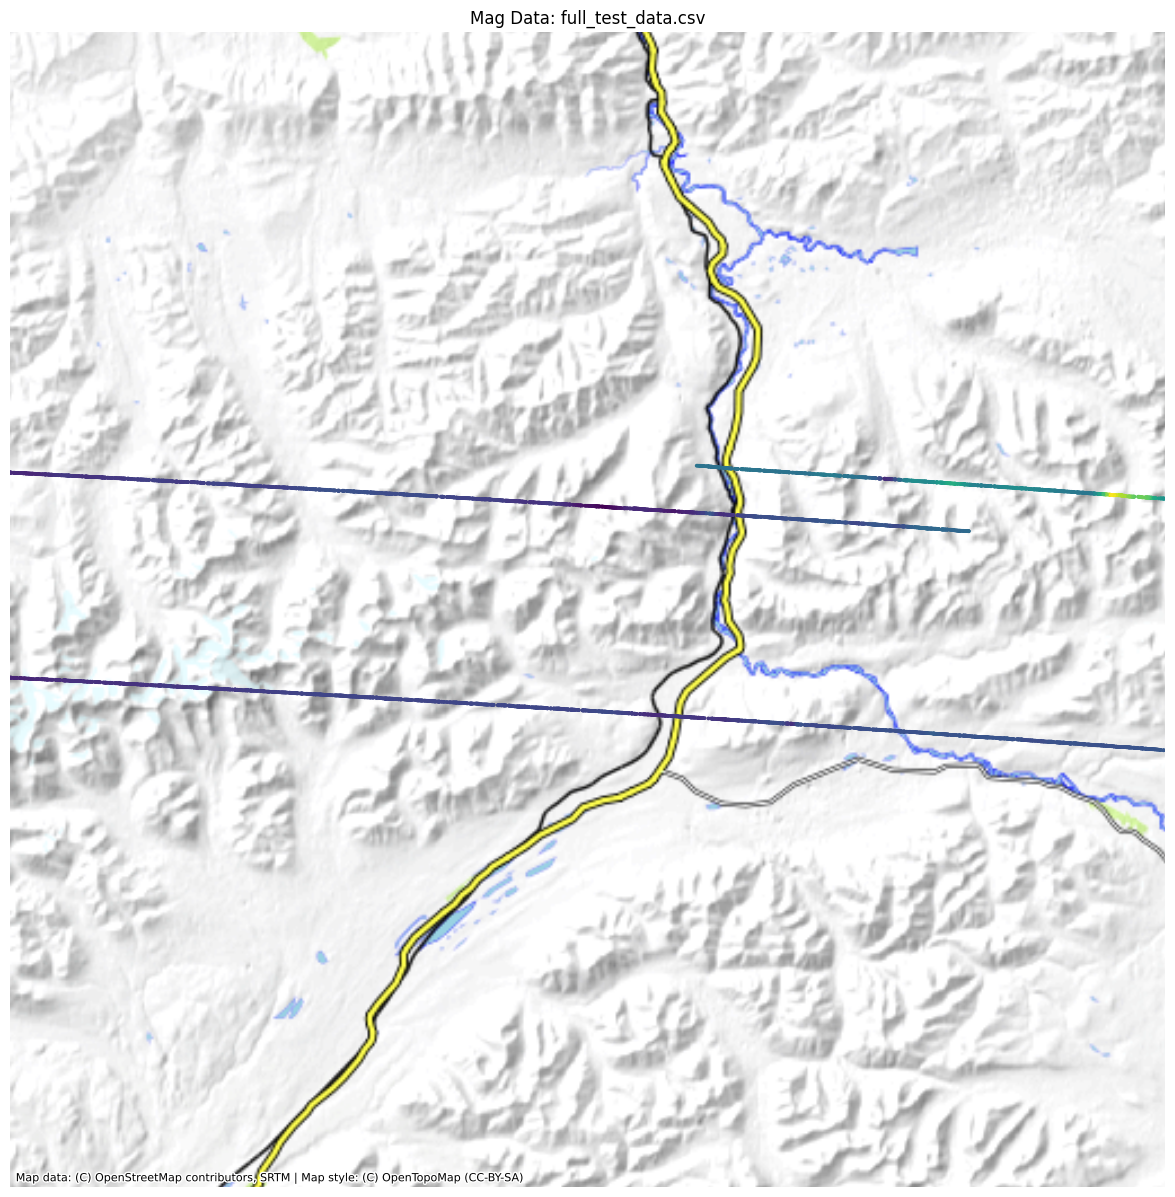

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
d.plot_map(markersize=3, zoom=9, ax=ax)
plt.show()

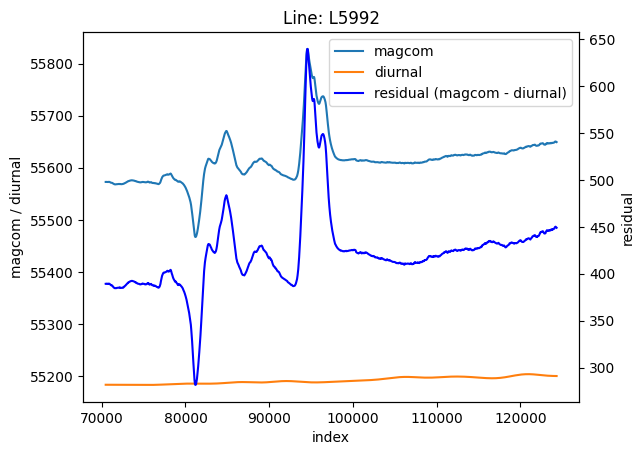

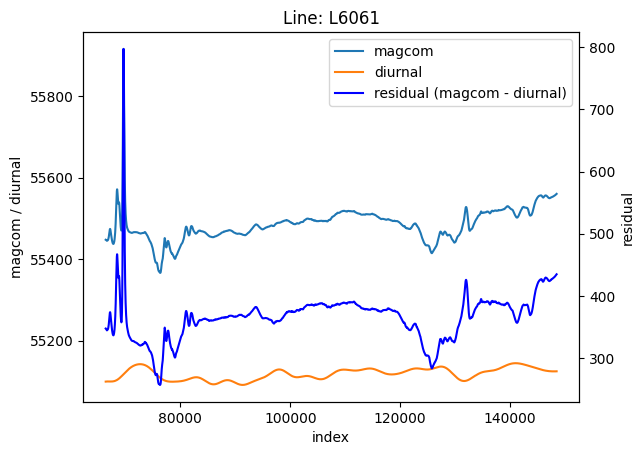

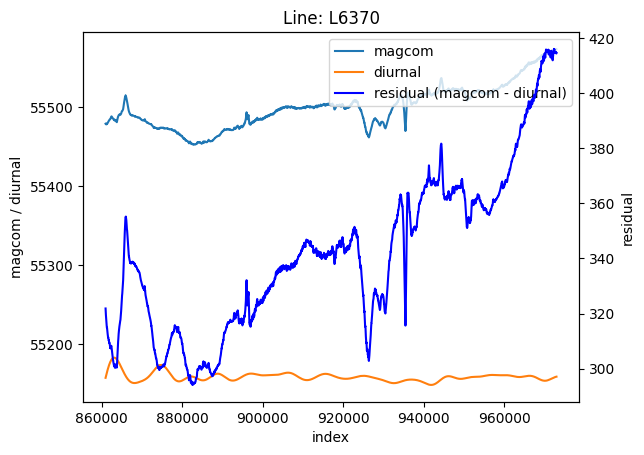

In [8]:
d.plot()

In [9]:
outpath = f"{datafile_path.rsplit('.', 1)[0]}__normalized.zip"
d.save(outpath)
print(f"Normalized data has been written to:\n\t{outpath}")

Normalized data has been written to:
	../example_datasets/full_test_data__normalized.zip


In [10]:
p = AirMagTools.pipeline.MagPipeline.parse("""
steps:
 - surface_error
 - elevation
 - set_constants
 - downline_distance
 - lowpass_filter_butterworth:
     cutoff_freq: 0.01 # Hz, note max at the nyquist freq at sample rate 40Hz / 2
 - highpass_filter_butterworth:
     cutoff_freq: 1.0 # Hz, note max at the nyquist freq at sample rate 40Hz / 2
     column_out: hf_noise
 - diurnal_qc_for_15s_chord
 - diurnal_qc_for_60s_chord
 - drape_and_speed_qc
 - noise_qc:
     mag_4th_diff_oos_threshold: 0.05
 - write_noise_summary
 - write_diurnal_summary
 - write_drape_summary
""", out_path = f"{datafile_path.rsplit('.', 1)[0]}__QcProc.out")

In [11]:
os.makedirs(p.pipeline["out_path"], exist_ok=True)
dp = p.run(d)

Running step 0: surface_error
Running step 1: elevation
Running step 2: set_constants
Running step 3: downline_distance
Running step 4: lowpass_filter_butterworth with cutoff_freq=0.01
Running step 5: highpass_filter_butterworth with cutoff_freq=1.0, column_out=hf_noise
Running step 6: diurnal_qc_for_15s_chord
Running step 7: diurnal_qc_for_60s_chord
Running step 8: drape_and_speed_qc
Running step 9: noise_qc with mag_4th_diff_oos_threshold=0.05
Running step 10: write_noise_summary
Running step 11: write_diurnal_summary
Running step 12: write_drape_summary


/Users/bbloss/MyCodes/AirMagTools/AirMagTools/magfilters.py:415: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  drape_summary = pd.concat([drape_summary, oos_drape], ignore_index=True) # add oos drape segments to summary dataframe


In [12]:
outpath = f"{datafile_path.rsplit('.', 1)[0]}__QcProc.zip"
dp.save(outpath)
print(f"Qc'd data has been written to:\n\t{outpath}")

Qc'd data has been written to:
	../example_datasets/full_test_data__QcProc.zip


In [13]:
dp

crs: 32605
filename: full_test_data.csv
sample_frequency: 40.000000009313226


                             count          mean           std           min           25%           50%           75%           max
date                      247882.0  2.023721e+03  6.817273e-03  2.023715e+03  2.023715e+03  2.023715e+03  2.023729e+03  2.023729e+03
dtm                       247882.0  4.075875e+02  1.626498e+02  1.202800e+02  3.041200e+02  3.721900e+02  4.798100e+02  1.330590e+03
diurnal                   247882.0  5.515270e+04  2.857570e+01  5.509173e+04  5.512978e+04  5.515686e+04  5.516484e+04  5.520381e+04
easting                   247882.0  6.986166e+05  3.236496e+04  6.399358e+05  6.707023e+05  7.019343e+05  7.240310e+05  7.591394e+05
gpsalt                    247882.0  6.133577e+02  2.099745e+02  2.623400e+02  4.724000e+02  5.671500e+02  6.944775e+02  1.599090e+03
maguncom                  247882.0  5.550192e+04  6.212145e+01  5.534899e+04  5.546006e+04  5.548458e+04  5.553544e+04  5.5

In [14]:
uline = dp.data.reset_index()
uline = uline.line.unique()
uline

array(['L5992', 'L6061', 'L6370'], dtype=object)

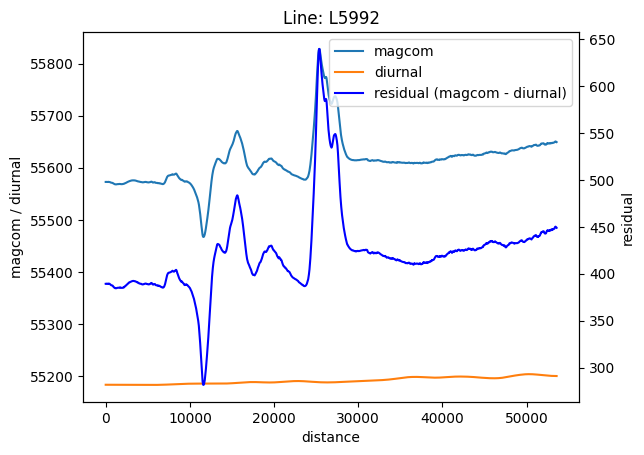

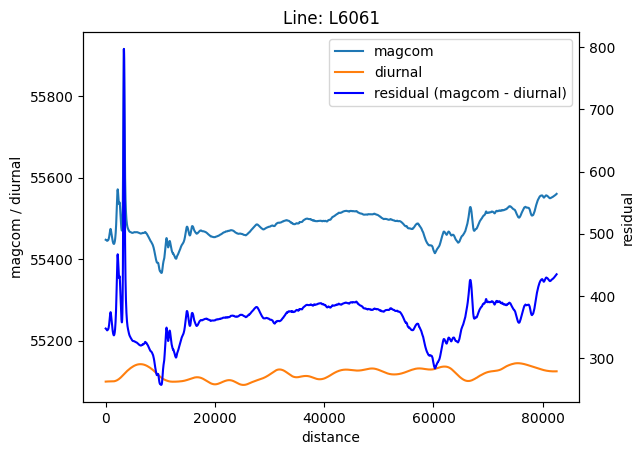

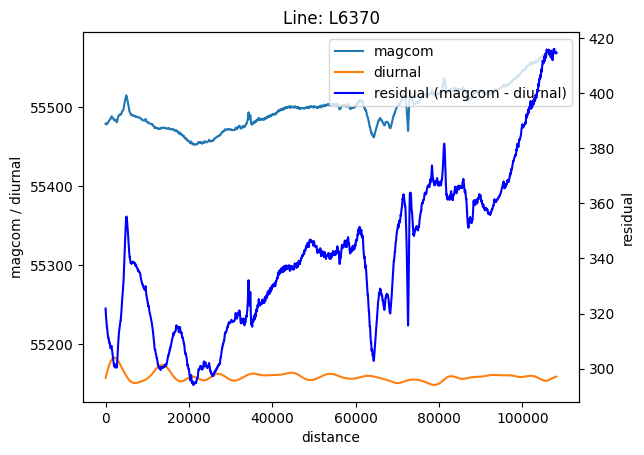

In [15]:
# plot line data
# plot all lines:
dp.plot_lines(
    AirMagTools.plots.plot_line,
    xcolumn="distance") # You can plot against any column, e.g. distance, UTCTIME, or "index" (FIDCOUNT).

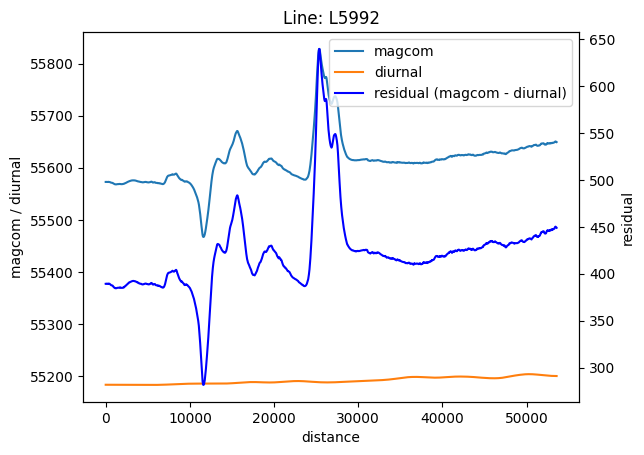

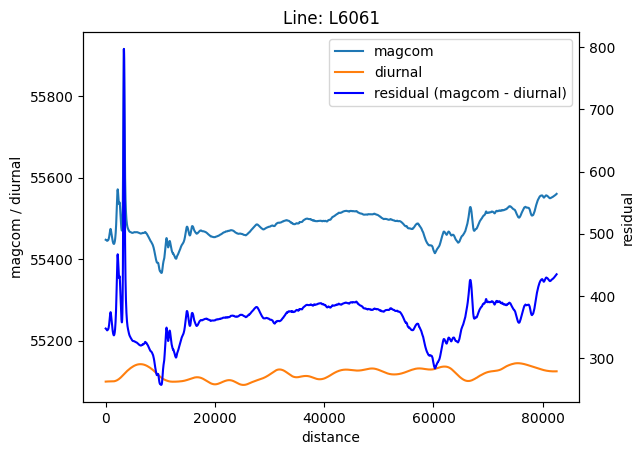

In [16]:
# plot line data
# plot specific lines:
dp.plot_lines(
    AirMagTools.plots.plot_line,
    lines=['L5992', 'L6061'], # Only plot these lines
    xcolumn="distance") # You can plot against any column, e.g. distance, UTCTIME, or "index" (FIDCOUNT).

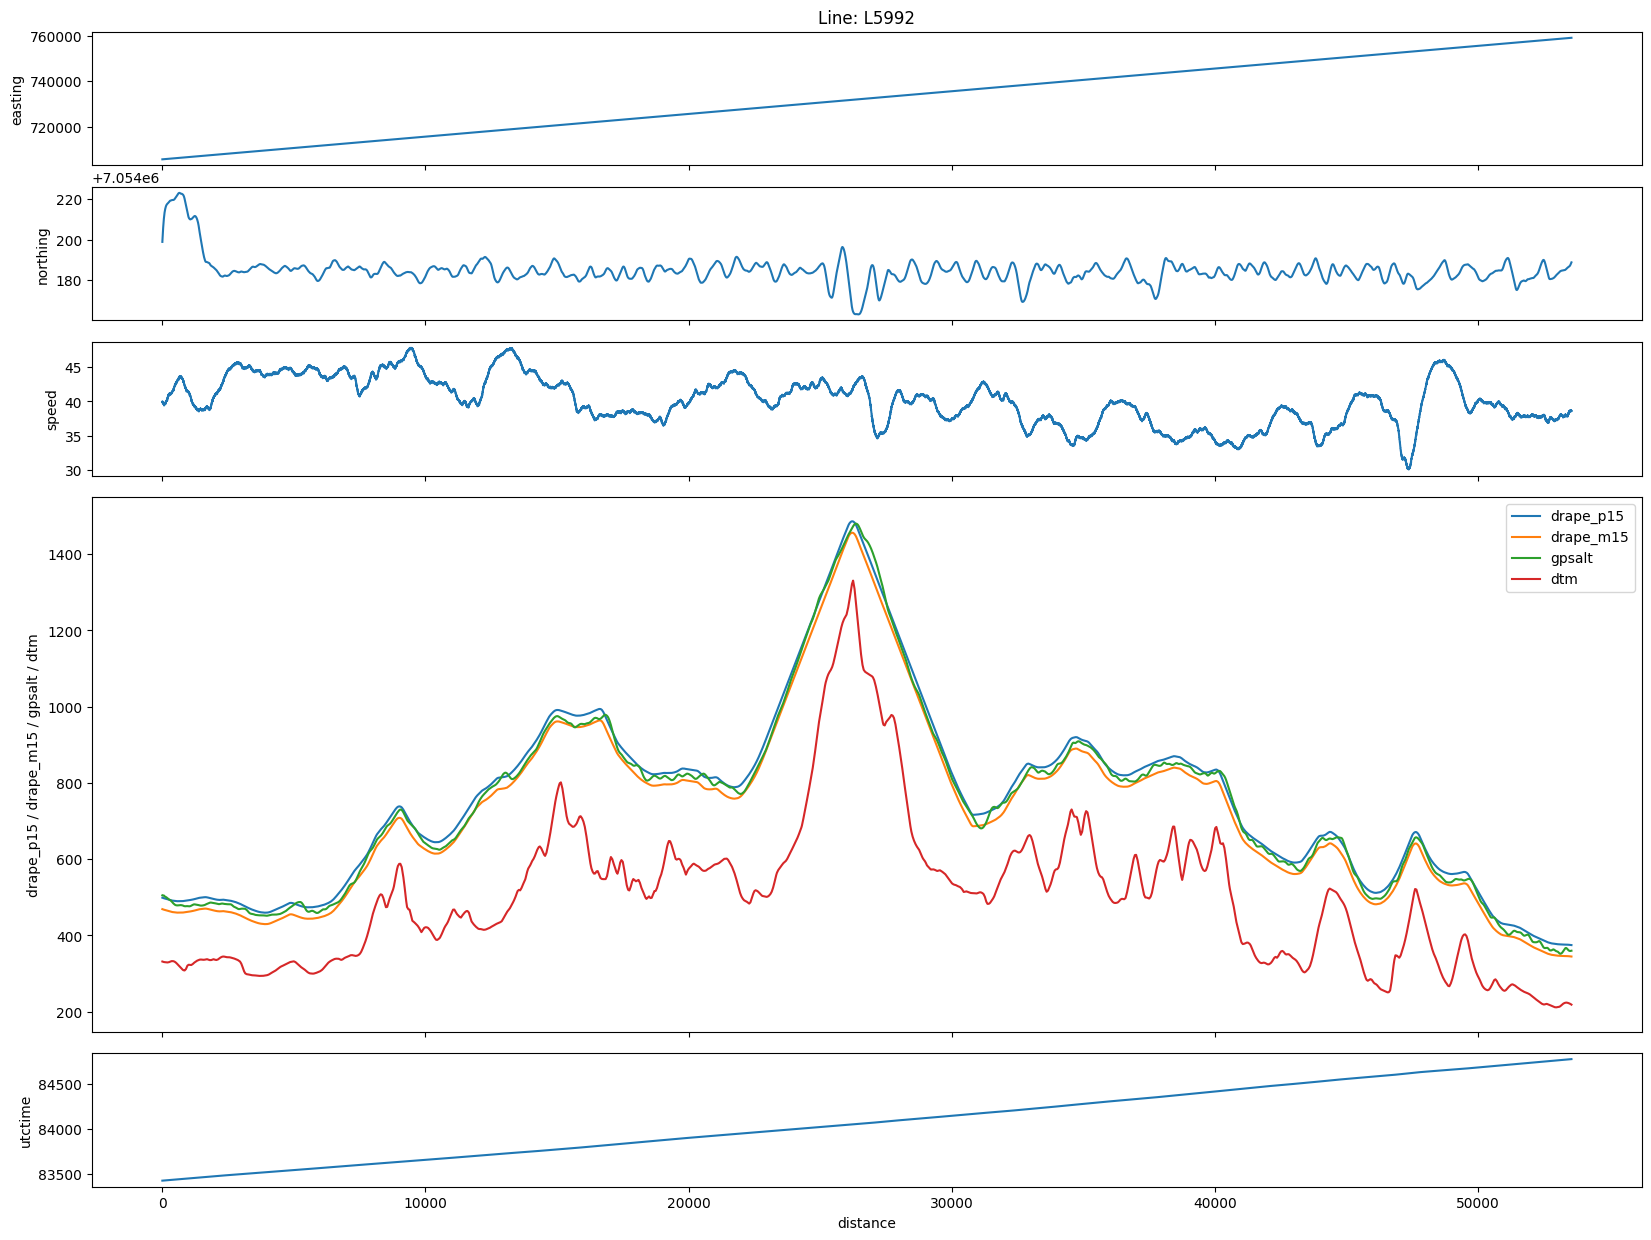

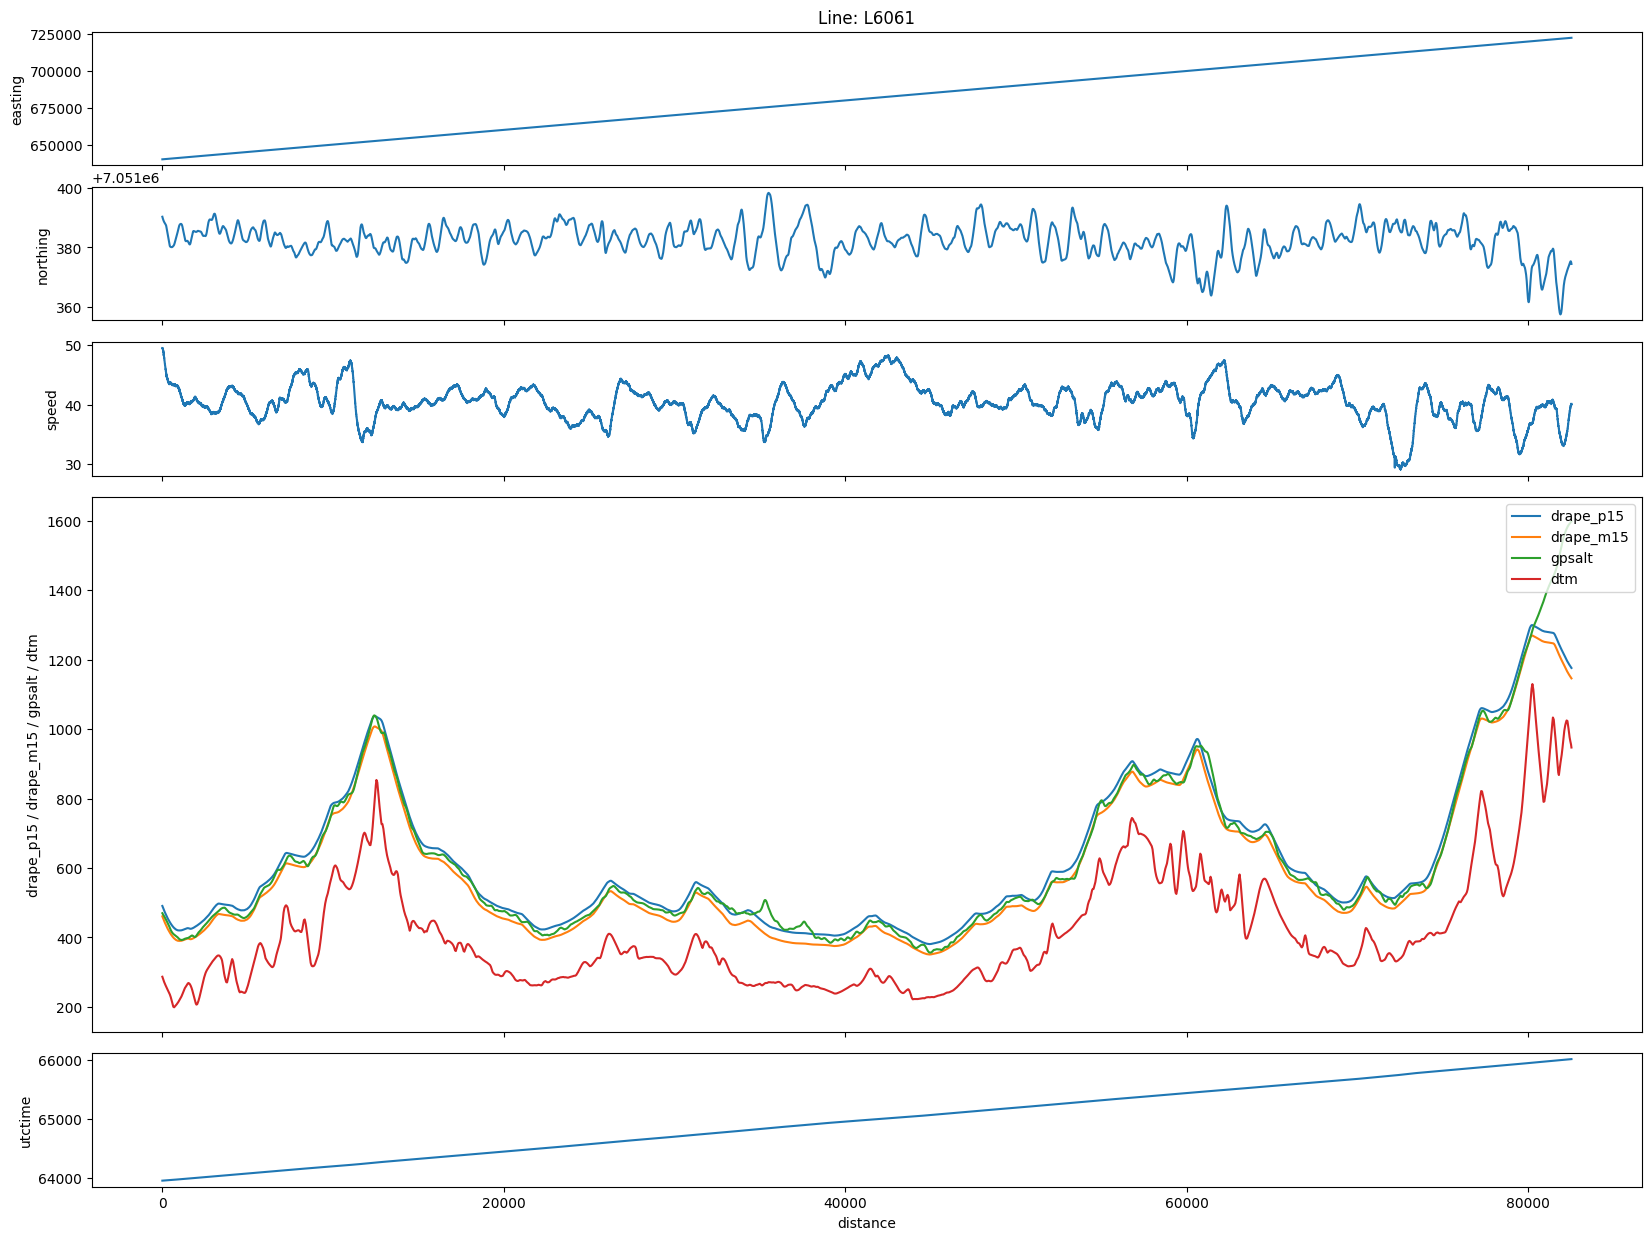

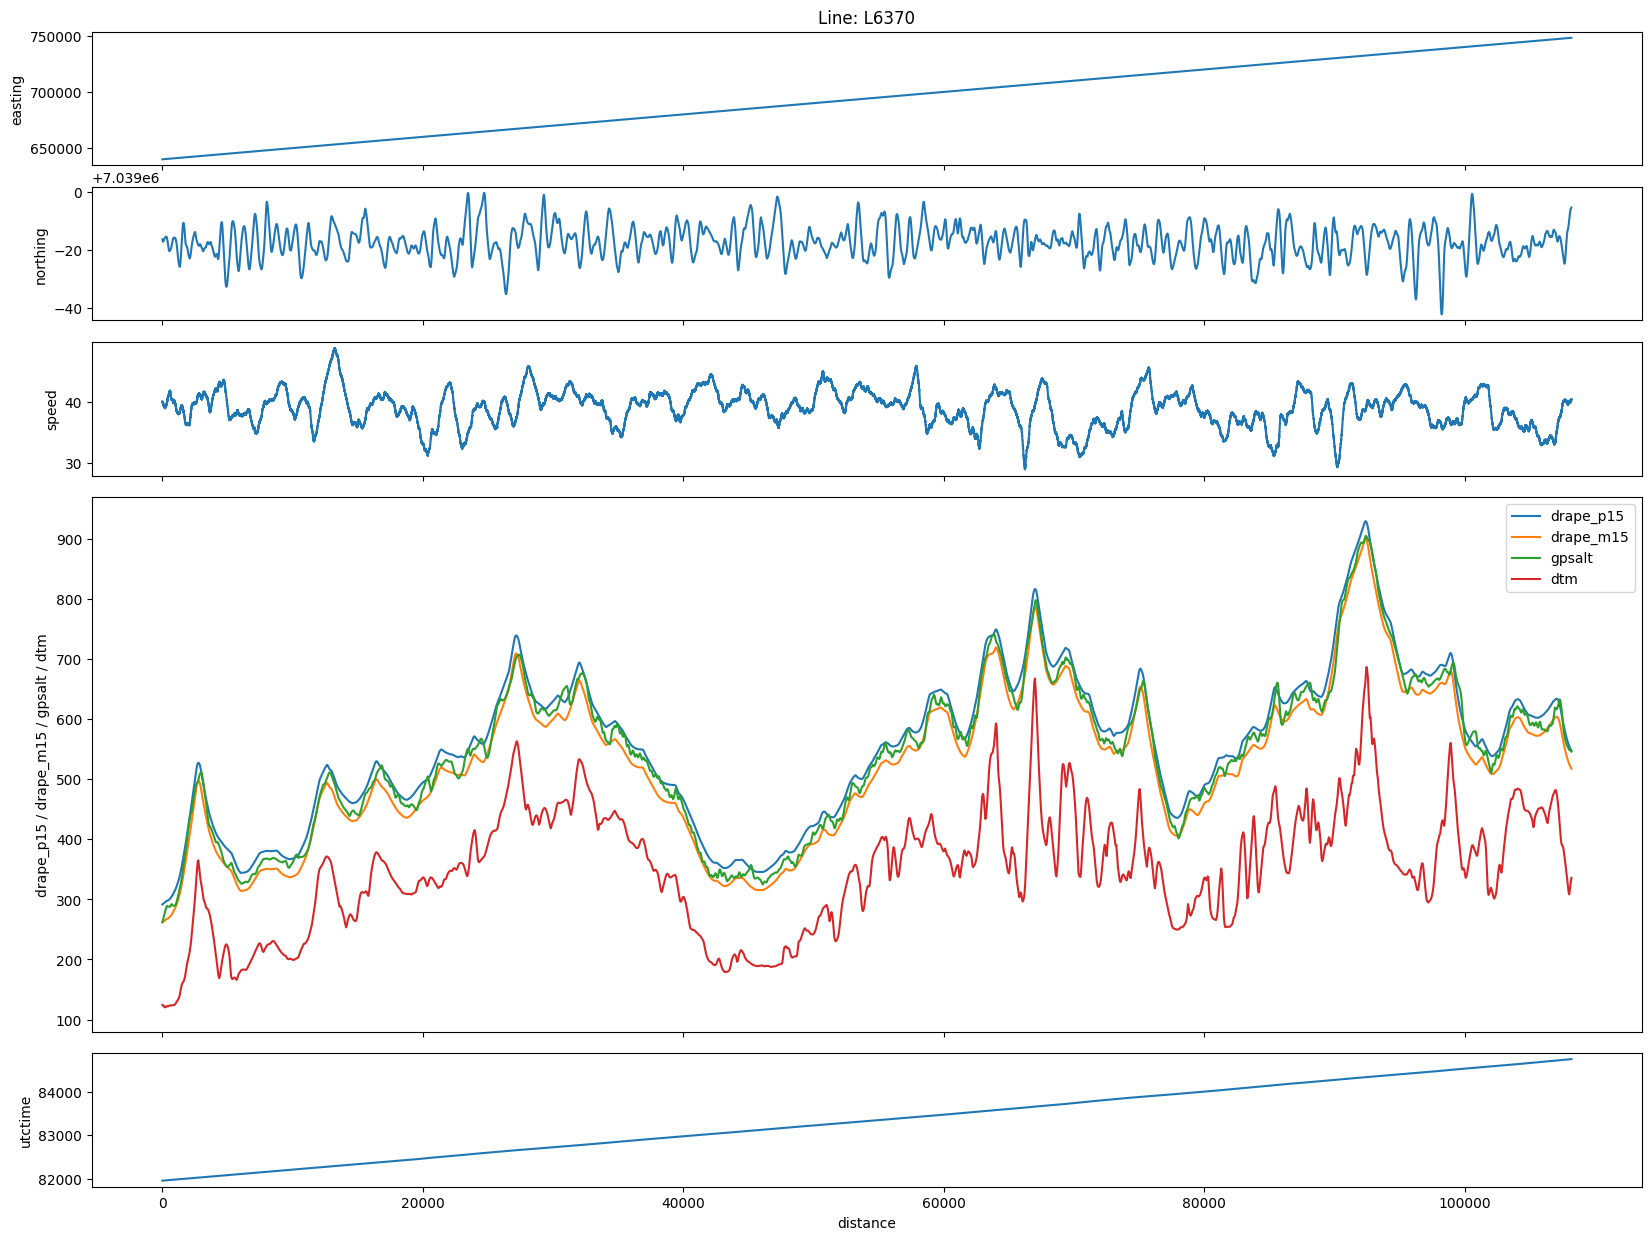

In [17]:
# plot QC of Bird altitude within drape evenlope
dp.plot_lines(
    AirMagTools.plots.plot_drape_qc,
    xcolumn="distance") # You can plot against any column, e.g. distance, UTCTIME, or "index" (FIDCOUNT).

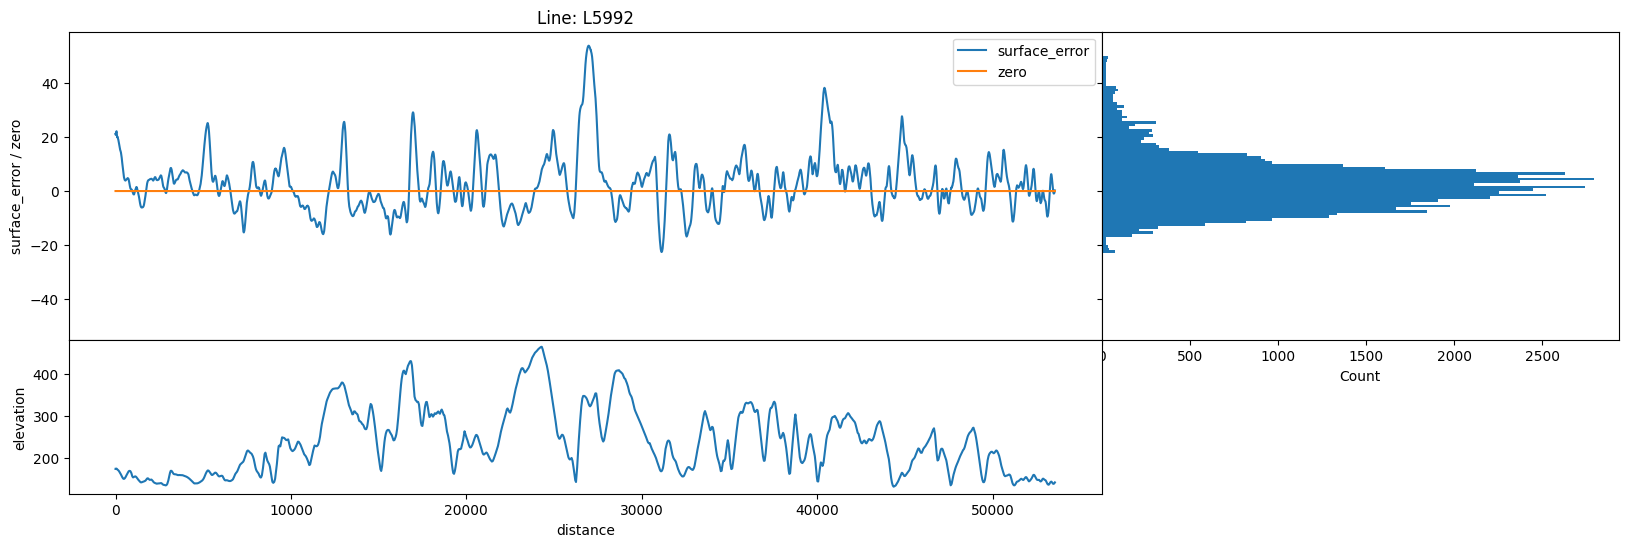

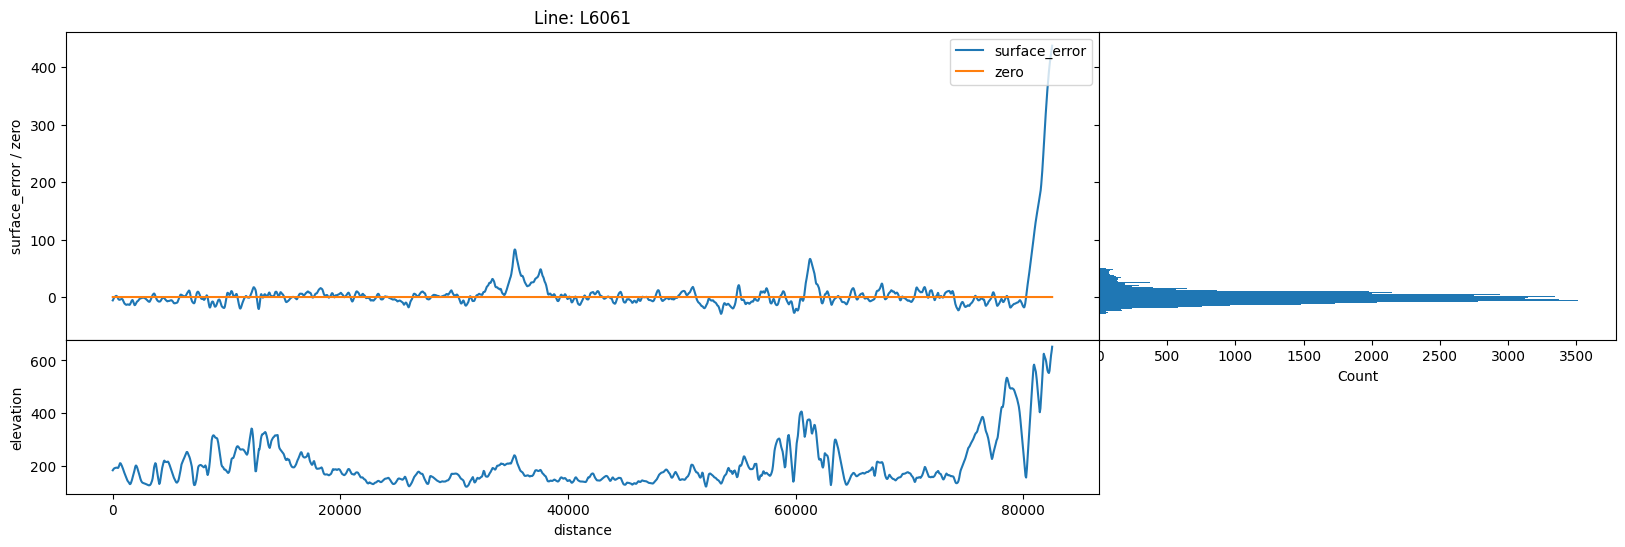

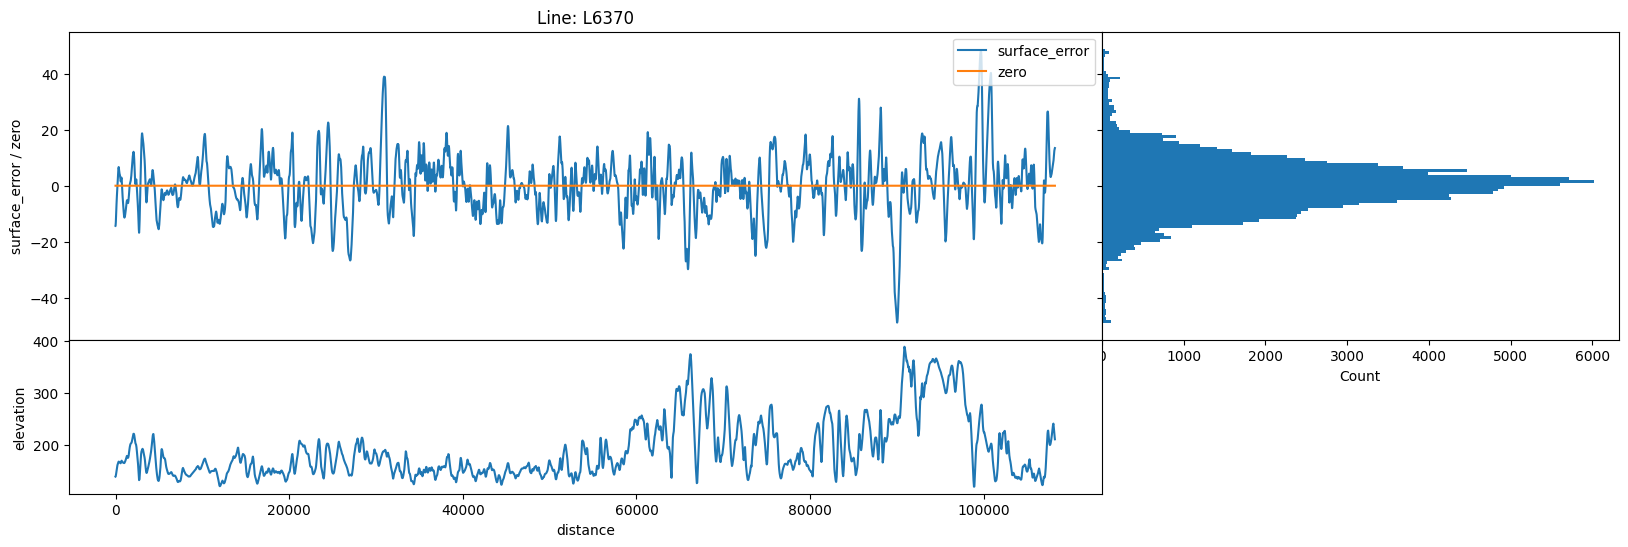

In [18]:
# plot QC of Bird altitude within drape evenlope
dp.plot_lines(
    AirMagTools.plots.plot_drape_qc2,
    #lines=[10010, 10030],
    xcolumn="distance") # You can plot against any column, e.g. distance, UTCTIME, or "index" (FIDCOUNT).

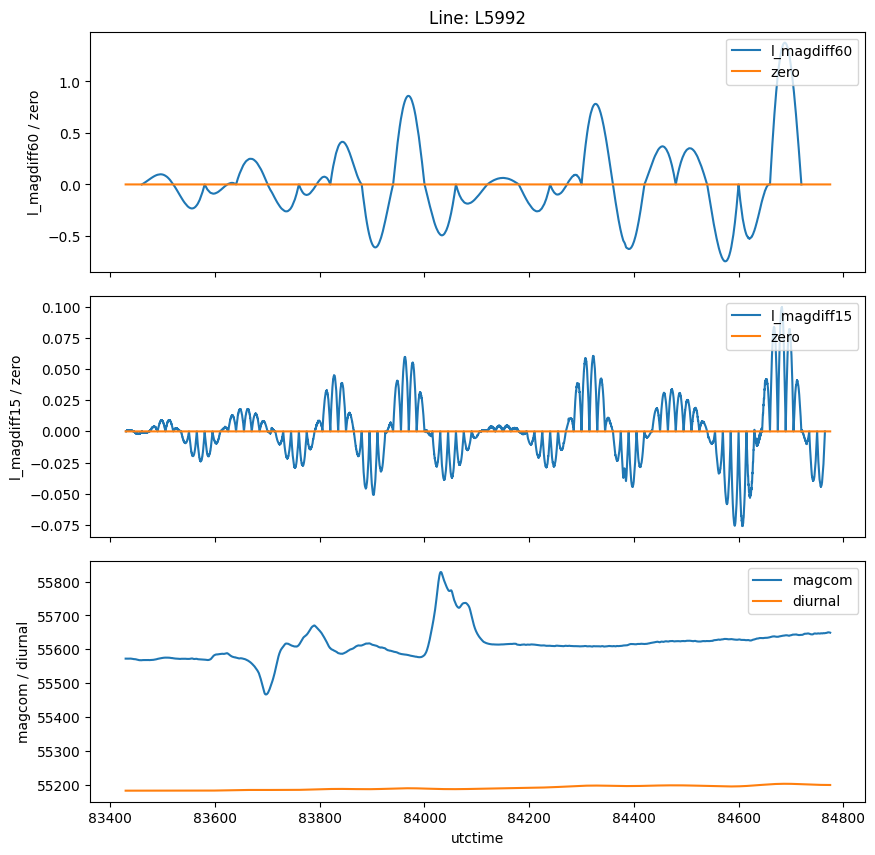

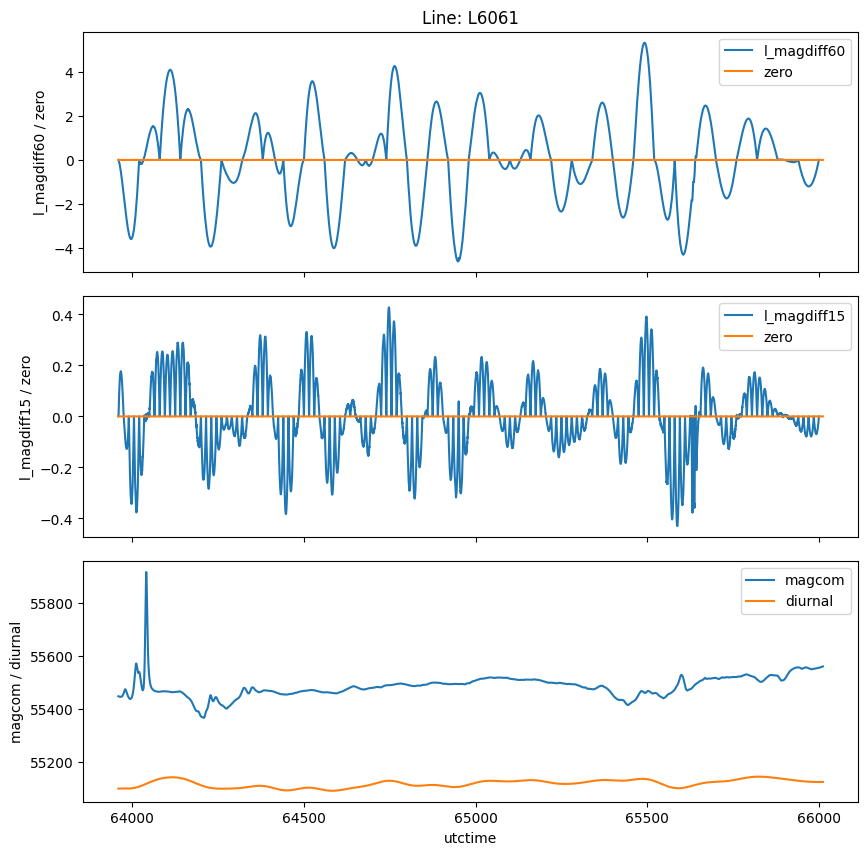

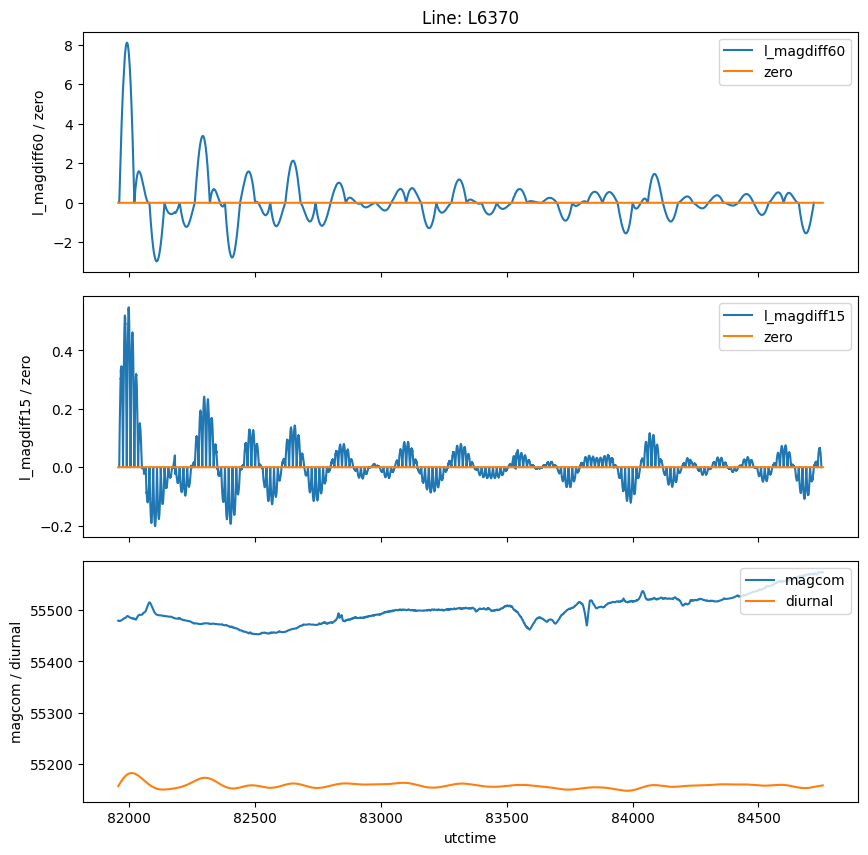

In [19]:
# Dirunal QC plots
dp.plot_lines(
    AirMagTools.plots.plot_diurnal_qc,
    #lines=[10010, 10030],
    xcolumn="utctime") # You can plot against any column, e.g. distance, UTCTIME, or "index" (FIDCOUNT).

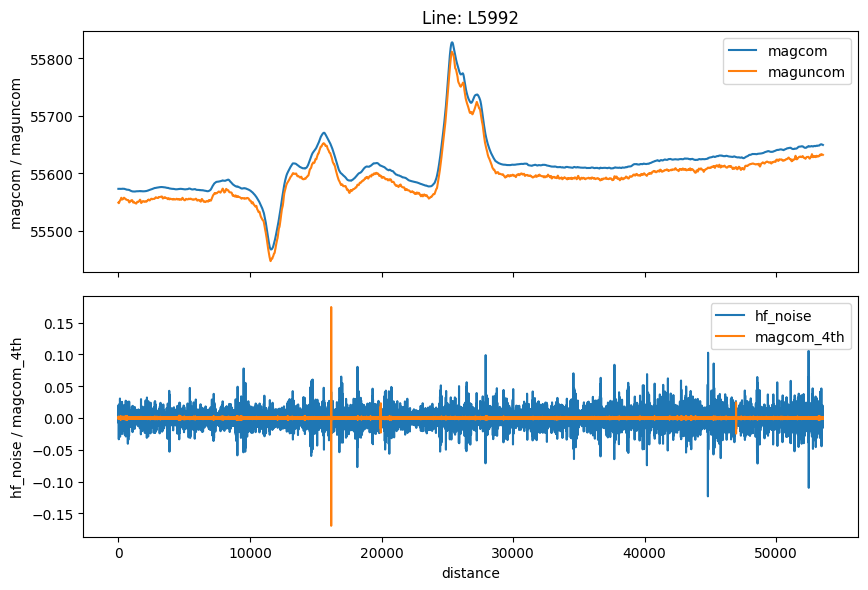

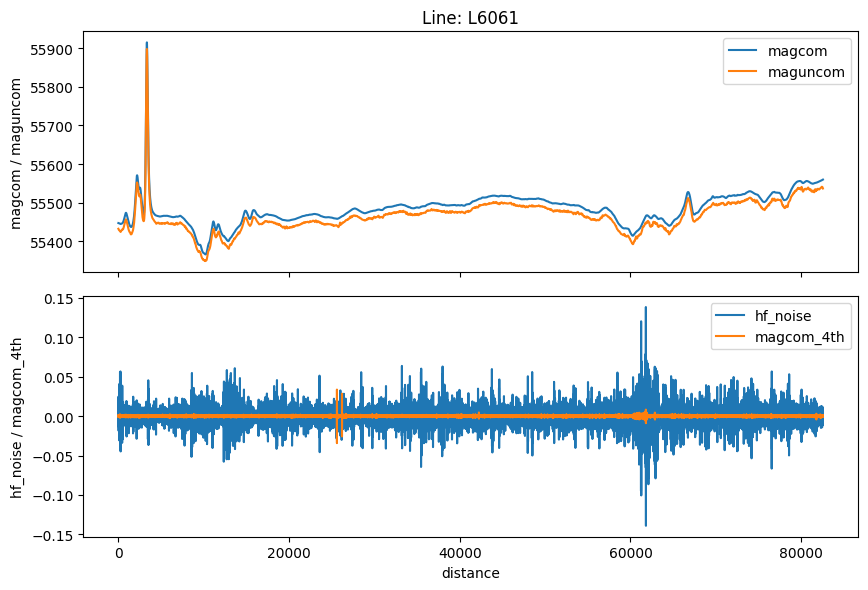

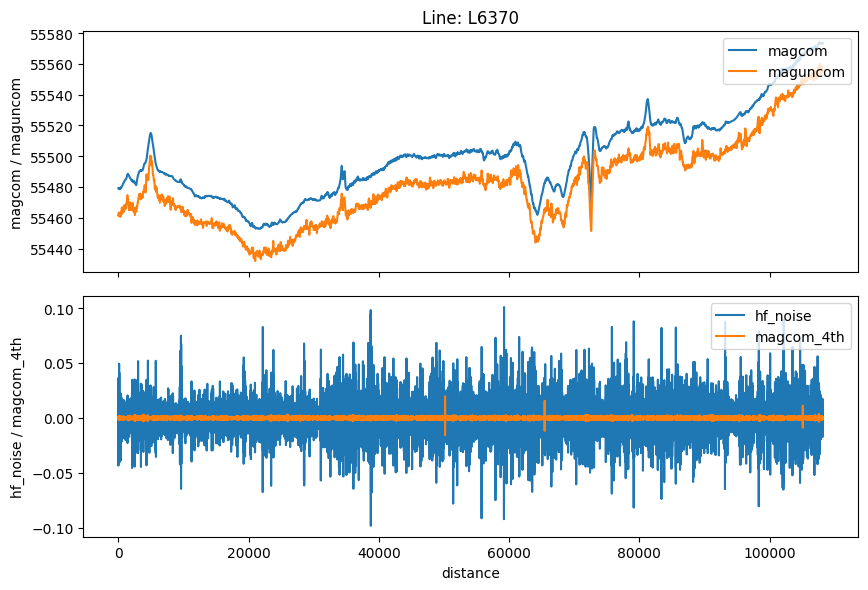

In [20]:
# Plot HF noise
dp.plot_lines(
    AirMagTools.plots.plot_hf_noise_qc,
    #lines=[10010, 10030],
    xcolumn="distance") # You can plot against any column, e.g. distance, UTCTIME, or "index" (FIDCOUNT).

In [21]:
outfile = f"{datafile_path.rsplit('/', 1)[1].rsplit('.',1)[0]}__QcProc.geojson"
outpath = f"{p.pipeline['out_path']}/{outfile}"
dp.as_geodataframe().to_file(outpath, driver="GeoJSON")
print(f"Qc'd data has been written a to a geojson file that can be imported into GIS applications:\n\t{outpath}")

Qc'd data has been written a to a geojson file that can be imported into GIS applications:
	../example_datasets/full_test_data__QcProc.out/full_test_data__QcProc.geojson


# Line Crossings QC:
note: example dataset does not have any tie lines - hence the following code blocks do not show this utility

In [22]:
lc = dp.find_line_crossings()

In [23]:
lc

Max distance: 10
Filename: full_test_data.csv
        
               count  mean  std  min  25%  50%  75%  max
gpsalt_diff      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
magcom_diff      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
maguncom_diff    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
distance         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

GEOSException: IllegalArgumentException: Points of LinearRing do not form a closed linestring

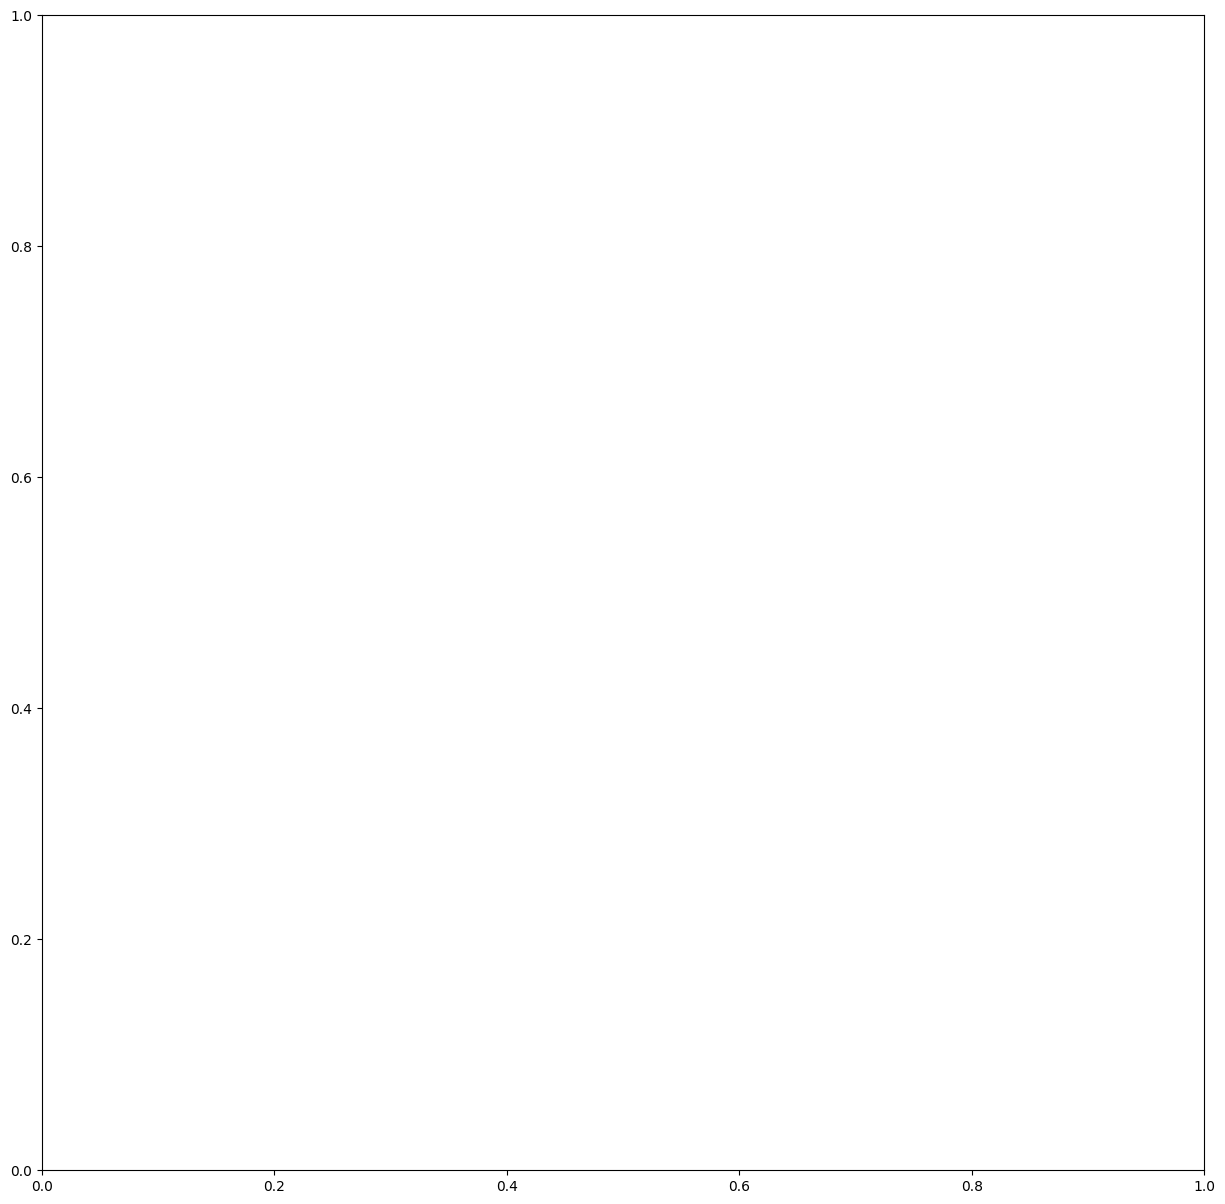

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))
lc.plot_map(markersize=3, zoom=9, ax=ax)

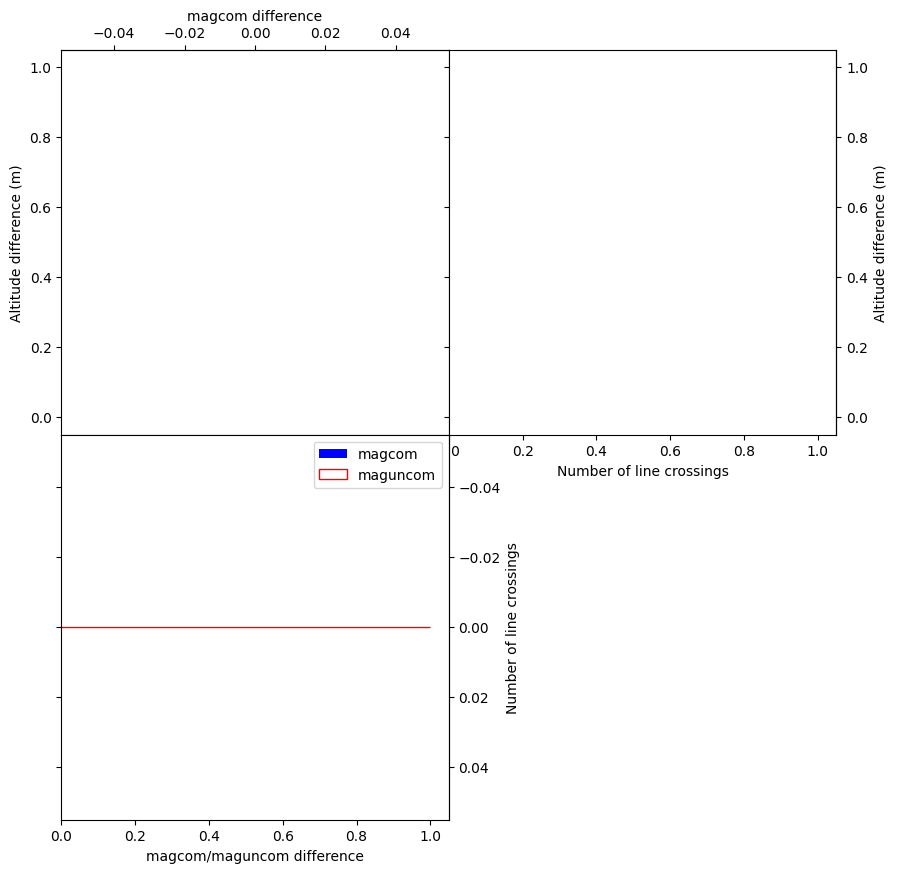

In [25]:
lc.plot(figsize=(10, 10))
plt.show()

In [26]:
outfile = f"{datafile_path.rsplit('/', 1)[1].rsplit('.',1)[0]}__linecrossings.geojson"
outpath = f"{p.pipeline['out_path']}/{outfile}"
lc.as_geodataframe().to_file(outpath, driver="GeoJSON")
print(f"Line Crossing Qc data has been written a to a geojson file that can be imported into GIS applications:\n\t{outpath}")

Line Crossing Qc data has been written a to a geojson file that can be imported into GIS applications:
	../example_datasets/full_test_data__QcProc.out/full_test_data__linecrossings.geojson


In [27]:
lc.crossings

,line_1,fidcount_1,date_1,dtm_1,diurnal_1,easting_1,gpsalt_1,maguncom_1,utctime_1,surface_1,...,drape_oos_mask_2,drape_oos_2,magcom_2nd_2,magcom_4th_2,mag_4th_diff_oos_mask_2,mag_4th_diff_oos_2,distance,gpsalt_diff,magcom_diff,maguncom_diff
